# Test Miscellaneous Scripts


In [1]:
## SETUP

# For plotting
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
%matplotlib inline

# For image manipulation
from skimage import color
from skimage import io

# For numpy
import numpy as np

# For scipy
from scipy import stats

In [2]:
# Read image in
img  = color.rgb2gray(io.imread('brain.png'))
imgN = color.rgb2gray(io.imread('brainNoisy.png'))
# Image between [0, 255]
Brain  = np.asarray(img) * 255
BrainN = np.asarray(imgN) * 255
# Flatten
BrainResh  = Brain.reshape(-1,1)
BrainReshN = BrainN.reshape(-1,1)
# Calculate histogram
BrainHist  = np.histogram(BrainResh, bins=np.arange(0,257))
BrainHistN = np.histogram(BrainReshN, bins=np.arange(0,257))
# Probabilities : 0 - 1
BrainProb  = BrainHist[0]  / len(BrainResh) # divide by number of samples
BrainProb  = BrainProb + 10**-20 # getting rid of 0 probabilities for log to work
BrainProbN = BrainHistN[0] / len(BrainReshN) # divide by number of samples
BrainProbN = BrainProbN + 10**-20 # getting rid of 0 probabilities for log to work
# Log2 of brain probabilities
BrainLog2Prob  = np.log2(BrainProb)
BrainLog2ProbN = np.log2(BrainProbN)
# Bins : 0 - 255
BrainBins  = BrainHist[1][:-1]
BrainBinsN = BrainHistN[1][:-1]

print(Brain.shape)
print(BrainResh.shape)
print(BrainBins.shape)
print(BrainProb.shape)

(1300, 1083)
(1407900, 1)
(256,)
(256,)


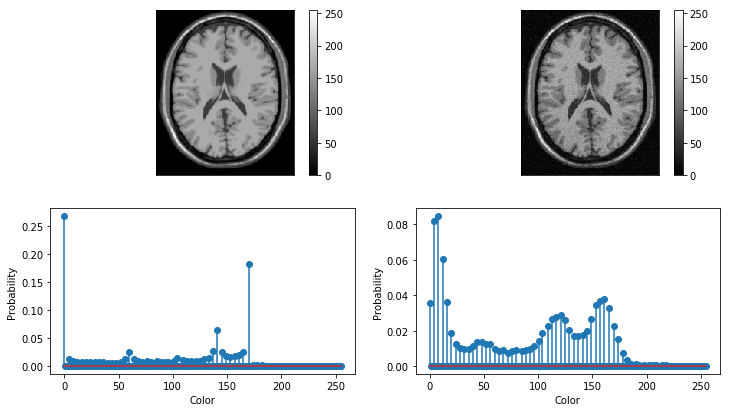

In [3]:
# Plot brain and histogram of brain
fig = plt.figure(figsize=(12, 14))
gs  = gridspec.GridSpec(4, 2, width_ratios=[1,1])#, height_ratios=[1,2]) 

# 1. Brain - no noise
ax0 = plt.subplot(gs[0])
im0 = ax0.imshow(Brain, cmap = "gray")
ax0.set_xticks([])
ax0.set_yticks([])
fig.colorbar(im0) # Colorbar

# 2. Brain - with noise
ax1 = plt.subplot(gs[1])
im1 = ax1.imshow(BrainN, cmap = "gray")
ax1.set_xticks([])
ax1.set_yticks([])
fig.colorbar(im1) # Colorbar

# 3. Histogram Brain
ax2 = plt.subplot(gs[2])
#ax1.hist(np.asarray(BrainResh),bins=256)
ax2.stem(BrainBins, BrainProb)
ax2.set_xlabel("Color")
ax2.set_ylabel("Probability")

# 4. Histogram Brain
ax3 = plt.subplot(gs[3])
#ax3.hist(np.asarray(BrainResh),bins=256)
ax3.stem(BrainBinsN, BrainProbN)
ax3.set_xlabel("Color")
ax3.set_ylabel("Probability")

plt.show()

In [4]:
# Calculate entropy
# Entropy is the average amount of information conveyed by an event 
entropy  = np.zeros(256)
entropyN = np.zeros(256)

for i in np.arange(0,256):
    logEntropy = np.log2(BrainProb[:i])
    entropy[i]  = -np.sum((BrainProb[:i] * \
                           BrainLog2Prob[:i]), axis=0)

    entropyN[i] = -np.sum((BrainProbN[:i] * \
                           BrainLog2ProbN[:i]), axis=0)

print("Noise free\nCalculated entropy: ", entropy[-1])
print("Scipy entropy     : ", stats.entropy(BrainProb, qk=None, base=2), "\n")
print("Noisy\nCalculated entropy: ", entropyN[-1])
print("Scipy entropy     : ", stats.entropy(BrainProbN, qk=None, base=2))

Noise free
Calculated entropy:  4.304207738934691
Scipy entropy     :  4.304597814070445 

Noisy
Calculated entropy:  5.227457424372302
Scipy entropy     :  5.228187040190376
